# Storytelling using Data: A Case Study using CBMS Data*

#### Justin Gabrielle A. Manay
###### *Pasay CBMS data is confidential and cannot be included with this project

## 1. Introduction

Poverty remains a prevalent issue in the Philippines today, and there are a multitude of factors which can affect it. The aim of this notebook is to look into how the educational attainment of the household head affects a household’s poverty status using Pasay City data from 2014 CBMS surveys and Python. 

Three key points will be considered in the exploratory analysis, namely: the relationship between the educational attainment of the household head and poverty, how the former affects his/her children’s educational outcomes, and how it can also affect his/her job status. We will see later on how the results can help us view education (or the lack thereof) as a poverty trap, effectively locking families into a cycle of poverty. 

Note that the 2014 Pasay CBMS dataset (household and members dataset) was used for this notebook. This dataset is confidential, so the notebook cannot be run as normal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Data Cleaning

Before loading the dataset, create a folder containing the 2014 csv files called "Pasay_2014_csv". Make sure that the jupyter notebook is in the same directory as the folder. We only loaded "main.csv" and "hpq_mem.csv".

In [296]:
# Load 2014 data
df_hh_2014 = pd.read_csv("Pasay_2014_csv/main.csv", encoding = "latin1", low_memory = False)
df_mem_2014 = pd.read_csv("Pasay_2014_csv/hpq_mem.csv", encoding = "latin1", low_memory = False)

For this study, two variables in particular need to be cleaned: (1) `totin`, or total annual income (located in `df_hh_2014`) and (2) `reln` or the relationship of each member to the household head (located in `df_mem_2014`).

#### 1) Cleaning `totin`

There are values of `totin` which do not make any sense. For example, if we check for values where `totin` = 0.0,

In [297]:
df_hh_2014[df_hh_2014["totin"] == 0.0]

,mainid,mainworkgroup,maindeviceserial,maintransferdate,androiddescription,geopoint_hh_ind,geopoint_hhlongitude,geopoint_hhlatitude,geopoint_hhaltitude,geopoint_hhaccuracy,...,prog_phiheal_spon_nmem,prog_phiheal_spon_impl,prog_phiheal_spon_impl_o,prog_phiheal_life,prog_phiheal_life_nmem,nprog,end_time,Unnamed: 486,Unnamed: 487,Unnamed: 488
516,2712335,137605000,b077b6800e8e7c8b,40:57.3,76 05 2 021 99 3227,00:00.0,120.9919,14.55432,83.7,20.0,...,0,NaN,NaN,2,0,0,22:43,NaN,NaN,NaN
1289,1591428,137605000,3be01109b8455128,21:13.5,76 05 6 046 99 10041,00:00.0,120.9984,14.55515,35.4,25.0,...,0,NaN,NaN,2,0,0,10:16,NaN,NaN,NaN
1890,1494386,137605000,285a228355aed69b,27:16.2,76 05 8 063 99 14186,00:00.0,121.0027,14.55035,-1.7,15.0,...,0,NaN,NaN,2,0,0,13:44,NaN,NaN,NaN
2388,80338,137605000,d1b4dbd3f5b2d9d1,50:00.1,76 05 9 072 99 16519,00:00.0,120.9965,14.54418,91.0,10.0,...,0,NaN,NaN,2,0,0,12:02,NaN,NaN,NaN
2578,3649041,137605000,572c634ca8f13099,45:25.5,76 05 10 075 99 18793,00:00.0,120.9972,14.53783,121.7,25.0,...,0,NaN,NaN,2,0,0,10:23,NaN,NaN,NaN
2591,1074568,137605000,a789239fb67f38f0,13:14.6,76 05 10 077 99 19066,00:00.0,120.9970,14.53591,-20.0,20.0,...,0,NaN,NaN,2,0,0,5:04,NaN,NaN,NaN
2602,1074561,137605000,a789239fb67f38f0,13:08.1,76 05 10 077 99 19136,00:00.0,120.9972,14.53599,-19.7,20.0,...,0,NaN,NaN,2,0,0,1:02,NaN,NaN,NaN
2604,1074564,137605000,a789239fb67f38f0,13:11.3,76 05 10 077 99 19152,00:00.0,120.9971,14.53608,-14.0,20.0,...,0,NaN,NaN,2,0,0,13:56,NaN,NaN,NaN
2671,2603395,137605000,78e6594d3d72ad06,35:19.5,76 05 10 083 99 20062,00:00.0,120.9944,14.54377,109.7,15.0,...,0,NaN,NaN,2,0,0,17:13,NaN,NaN,NaN
2717,1385197,137605000,839316aadd3c,37:10.8,76 05 11 094 99 20536,00:00.0,120.9995,14.54612,26.3,20.0,...,0,NaN,NaN,2,0,0,12:19,NaN,NaN,NaN


There are 257 rows for which `totin` has a zero value. We cannot reasonably impute a value to `totin` in this case. Compared to the 59,566 observations in the dataset, this number is negligible, so we can safely drop them from our sample. 

In [298]:
df_hh_2014 = df_hh_2014.drop(df_hh_2014[df_hh_2014["totin"] == 0.0].index, axis = 0)

#### 2) Cleaning `reln`

In our case, we will be considering only one household head per family. However, if we count the number of household heads per family in the `df_mem_2014` dataset,

In [299]:
no_hhead = df_mem_2014[df_mem_2014["reln"] == 1].groupby("mainid")["reln"].size().reset_index(name = "no")
to_clean_reln = list(no_hhead.loc[no_hhead["no"] > 1, "mainid"])

There are 191 households where more than 1 household head had been listed. As with #1, we can drop these rows since these are negligible in number.

In [300]:
df_mem_2014 = df_mem_2014.drop(df_mem_2014[df_mem_2014["mainid"].isin(to_clean_reln)].index, axis = 0)

#### 3) Generating new variables

We now add some of the variables in `df_mem_2014` to the `df_hh_2014` dataset. These include:
- `educal`: a categorical variable describing the highest educational attainment of the household head
- `educal2`: `educal`, categorized into four groups: grade school, high school, vocational and college
- `sex`: a categorical variable describing the sex of the household head - 1 if male, 2 otherwise
- `numdep`: the number of dependents in the household (dependents being those aged below 15 and above 59)
- `depratio`: the ratio of dependents to household size
- `totinc_percap`: total income per capita
- `ispoor`: defined as those whose total income per capita is less than P 25,007 (based on the 2015 poverty threshold for Pasay City) - 1 if poor, 0 otherwise

All variables for which `educal`, `age_yr` and `sex` are NaN's will be dropped. 

In [301]:
# Generate some of the household-level variables from df_mem_2014 - 1
hh_subset = df_mem_2014[["mainid", "reln", "educal", "age_yr", "sex"]]
hh_subset = hh_subset[hh_subset["reln"] == 1].reset_index(drop = True)
hh_subset = hh_subset.drop("reln", axis = 1)
df_hh_2014 = pd.merge(df_hh_2014, hh_subset, on = "mainid", how = "left")
df_hh_2014[["educal", "age_yr", "sex"]] = df_hh_2014[["educal", "age_yr", "sex"]].dropna(axis = 0)

hh_subset = df_mem_2014[["mainid", "age_yr"]]
hh_subset = hh_subset[(hh_subset["age_yr"] >= 60) | (hh_subset["age_yr"] <= 14)].groupby("mainid")["age_yr"].count().to_frame("numdep").reset_index()
df_hh_2014 = pd.merge(df_hh_2014, hh_subset, on = "mainid", how = "left")
df_hh_2014["numdep"] = df_hh_2014["numdep"].fillna(0)

In [302]:
# Generate some of the household-level variables from df_mem_2014 - 2
gs_idx = [1, 2, 11, 12, 13, 14, 15, 16, 51, 53, 100]
hs_idx = [17, 18, 19, 20, 21, 22, 52, 54, 200]
voc_idx = [23, 24, 25, 210]
col_idx = [31, 32, 33, 34, 41, 300, 400]

df_hh_2014["educal2"] = df_hh_2014["educal"].apply(lambda x: "grade school" if x in gs_idx else ("high school" if x in hs_idx else ("vocational" if x in voc_idx else ("college" if x in col_idx else np.nan))))
df_hh_2014["sex"] = df_hh_2014["sex"].apply(lambda x: 1 if x == 1 else 0)
df_hh_2014["depratio"] = df_hh_2014["numdep"] / df_hh_2014["phsize"]
df_hh_2014["totin_percap"] = df_hh_2014["totin"] / df_hh_2014["phsize"]
df_hh_2014["ispoor"] = (df_hh_2014["totin_percap"] <= 25007) * 1

### 3.3.2 Exploratory Data Analysis

Since our objective is to determine how the educational attainment of the household head influences a household's poverty status, we intend to look into it directly (as in point 1), as well as examine how the household head's educational attainment affects key poverty determinants such as his/her children's educational outcomes (point 2) and his/her job status (point 3). As such, bar graphs will primarily be employed, since the focus is on the comparison of the outcomes for different educational attainments.

##### 1) How is the educational attainment of the household head related to particular poverty measures/correlates (e.g., income per capita, family size, dependency ratio, etc.)? 

To visualize how the educational attainment of the household head affects the poverty status of a household, it helps to find out how it affects total income per capita (since poverty status is computed directly from it). First, we compute the mean income per `educal2` group:

Text(0.5,-0.6,'Figure 1. Mean income per capita')

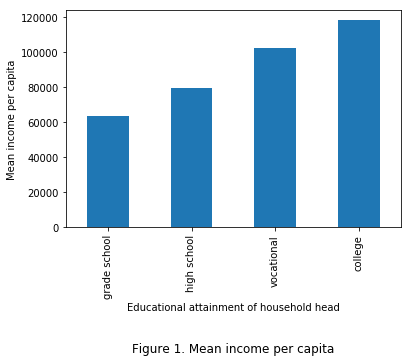

In [303]:
# Plot mean income per educational attainment group
inc_per_grp = df_hh_2014.groupby("educal2")["totin_percap"].mean().reset_index()

educ_levels = ["grade school", "high school", "vocational", "college"]
educ_mapping = {level: i for i, level in enumerate(educ_levels)}
key = inc_per_grp["educal2"].map(educ_mapping)
inc_per_grp = inc_per_grp.iloc[key.argsort()]

inc_per_grp.plot.bar(x = inc_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Mean income per capita")
plt.title("Figure 1. Mean income per capita", y = -0.6)

Notice from Figure 1 that those whose household heads finished within grade school earn the least on average, while those whose heads finished within high school are not too far behind. Meanwhile, those whose household heads finish within college earn around P30,000 more, compared to them. This reinforces the notion that the education provides one with skills which can then be used to find higher-earning jobs.

We can also plot the number of poor households per `educal2` group.

Text(0.5,-0.6,'Figure 2. Percentage of poor households')

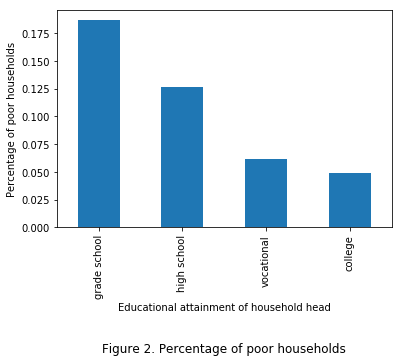

In [304]:
# Plot the number of poor households per educational attainment group.
pov_per_grp = (df_hh_2014.groupby("educal2")["ispoor"].sum() / df_hh_2014.groupby("educal2")["educal2"].count()).reset_index()

key = pov_per_grp["educal2"].map(educ_mapping)
pov_per_grp = pov_per_grp.iloc[key.argsort()]

pov_per_grp.plot.bar(x = pov_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Percentage of poor households")
plt.title("Figure 2. Percentage of poor households", y = -0.6)

Again, this is roughly in line with what we observed earlier. From Figure 2, around 18% of households where the household head finished within grade school now experience poverty, while those where the household head finished high school are not far behind. We can also look at the family size and dependency ratio to get a better profile.

Text(0.5,-0.6,'Figure 3. Family size')

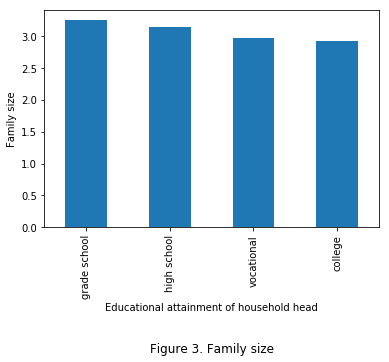

In [305]:
# Plot mean dependency ratio per educational attainment group.
phsize_per_grp = df_hh_2014.groupby("educal2")["phsize"].mean().reset_index()

key = phsize_per_grp["educal2"].map(educ_mapping)
phsize_per_grp = phsize_per_grp.iloc[key.argsort()]

phsize_per_grp.plot.bar(x = phsize_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Family size")
plt.title("Figure 3. Family size", y = -0.6)

Text(0.5,-0.6,'Figure 4. Mean dependency ratio')

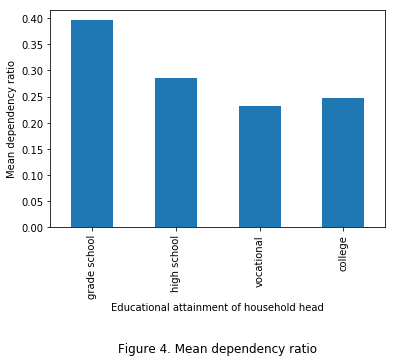

In [306]:
# Plot mean dependency ratio per educational attainment group.
depratio_per_grp = df_hh_2014.groupby("educal2")["depratio"].mean().reset_index()

key = depratio_per_grp["educal2"].map(educ_mapping)
depratio_per_grp = depratio_per_grp.iloc[key.argsort()]

depratio_per_grp.plot.bar(x = depratio_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Mean dependency ratio")
plt.title("Figure 4. Mean dependency ratio", y = -0.6)

Now from Figures 3 and 4, we see that not only do households where the household head finished within grade school earn the least income, but they also bear the burden of having larger families and more dependents on average. This supports the common claim that education not only helps in developing the right job skills, but it also aids in developing proper family planning and management skills.

We can also check the variable `fshort`, which tells whether or not the family experienced hunger in the past three months.

Text(0.5,-0.6,'Figure 5. Food Shortage Incidence')

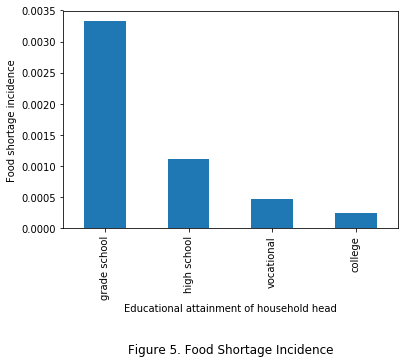

In [307]:
# Plot food shortage incidence per educational attainment group.
df_hh_2014["fshort"] = df_hh_2014["fshort"].apply(lambda x: 1 if x == 1 else 0)

fshort_per_grp = (df_hh_2014.groupby("educal2")["fshort"].sum() / df_hh_2014.groupby("educal2")["fshort"].count()).reset_index()

key = fshort_per_grp["educal2"].map(educ_mapping)
fshort_per_grp = fshort_per_grp.iloc[key.argsort()]

fshort_per_grp.plot.bar(x = fshort_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Food shortage incidence")
plt.title("Figure 5. Food Shortage Incidence", y = -0.6)

While the incidence of food shortage is generally small in Pasay City, a majority of the cases are among households where the household head finished within grade school. 

We can also check the participation in government programs like the conditional cash transfer (CCT) program.

Text(0.5,-0.6,'Figure 6. Participation in CCT')

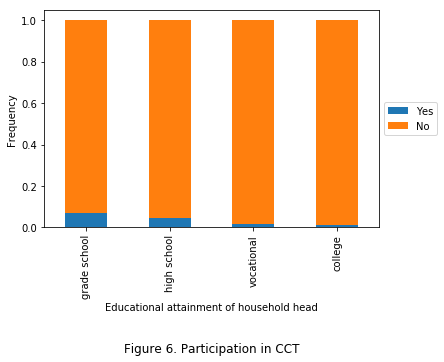

In [308]:
# Plot CCT participation per educational attainment group.
cct_per_grp = df_hh_2014.groupby(["educal2", "prog_cct"])["educal2"].count() / df_hh_2014.groupby("educal2")["educal2"].count()
cct_per_grp = cct_per_grp.unstack("prog_cct").reset_index()

key = cct_per_grp["educal2"].map(educ_mapping)
cct_per_grp = cct_per_grp.iloc[key.argsort()]

cct_per_grp.plot.bar(x = cct_per_grp["educal2"], stacked = True, legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Frequency")
plt.legend(["Yes", "No"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Figure 6. Participation in CCT", y = -0.6)

From Figure 6, participation is slightly higher for households where the household head finished within grade school compared to the other groups, again in line with the earlier observations.

<b> SUMMARY: </b>

In general, households where the household head finished within grade school tend to have lower income. As a result, poverty rates for these households are higher. Family size and dependency ratio are also higher for this group of households. They also tend to experience food shortage and are more likely to participate in the CCT program. 

##### 2) How does the educational attainment of the household head affect the educational outcomes of his/her children? 

In order to explain our observations in point 1, we need to delve into how the household head's educational attainment can eventually result in poverty. One way by which the household head's educational attainment can influence a household's poverty status is by affecting his/her children and grandchildren's educational outcomes. It may be that the household head's own outlook on education is "inherited" by the children/grandchildren, so that they too are convinced to pursue college or to drop out early. It could also be that household heads who drop out early cannot get decently-earning jobs, so they enlist the help of their children, so that they end up dropping out early too. 

Note that the children/grandchildren are marked in the data as when `reln` = 3, 4 or 5. However, since we are concerned with the household head's children/grandchildren who are of schooling age, we limit our observations to children/grandchildren who are between the ages of 5 and 21. Also, since we are concerned with those who drop out from school, we exclude children who are of age 4 in the data, since a quick histogram will reveal that many families do not send their children to school at that age, probably because they believe that they are too young for school.

In [309]:
# Generate all variables required.
df_mem_2014["educind"] = df_mem_2014["educind"].apply(lambda x: 1 if x == 1 else 0)
df_mem_2014["jobind"] = df_mem_2014["jobind"].apply(lambda x: 1 if x == 1 else 0)
hh_subset = df_mem_2014[["mainid", "reln", "age_yr", "sex", "educind", "jobind"]]

numchild_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20)].groupby("mainid")["age_yr"].count().to_frame("numchild").reset_index()
numschool_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20)].groupby("mainid")["educind"].sum().to_frame("numschool").reset_index()
sumages_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20) & (hh_subset["educind"] == 0)].groupby("mainid")["age_yr"].sum().to_frame("sum_ages_not_school").reset_index()
nummale_not_school_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20) & (hh_subset["educind"] == 0) & (hh_subset["sex"] == 1)].groupby("mainid")["mainid"].count().to_frame("male_not_school").reset_index()
nummale_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20) & (hh_subset["sex"] == 1)].groupby("mainid")["mainid"].count().to_frame("male").reset_index()
numfemale_not_school_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20) & (hh_subset["educind"] == 0) & (hh_subset["sex"] == 2)].groupby("mainid")["mainid"].count().to_frame("female_not_school").reset_index()
numfemale_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20) & (hh_subset["sex"] == 2)].groupby("mainid")["mainid"].count().to_frame("female").reset_index()
childemp_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20) & (hh_subset["educind"] == 0)].groupby("mainid")["jobind"].sum().to_frame("childemp").reset_index()

df_hh_2014 = pd.merge(df_hh_2014, numchild_subset, on = "mainid", how = "left")
df_hh_2014 = pd.merge(df_hh_2014, numschool_subset, on = "mainid", how = "left")
df_hh_2014 = pd.merge(df_hh_2014, sumages_subset, on = "mainid", how = "left")
df_hh_2014 = pd.merge(df_hh_2014, nummale_not_school_subset, on = "mainid", how = "left")
df_hh_2014 = pd.merge(df_hh_2014, nummale_subset, on = "mainid", how = "left")
df_hh_2014 = pd.merge(df_hh_2014, numfemale_not_school_subset, on = "mainid", how = "left")
df_hh_2014 = pd.merge(df_hh_2014, numfemale_subset, on = "mainid", how = "left")
df_hh_2014 = pd.merge(df_hh_2014, childemp_subset, on = "mainid", how = "left")

In [310]:
# Fill all missing values with 0
df_hh_2014[["numchild", "numschool", "sum_ages_not_school", "male_not_school", "male", "female_not_school", "female", "childemp"]] = df_hh_2014[["numchild", "numschool", "sum_ages_not_school", "male_not_school", "male", "female_not_school", "female", "childemp"]].fillna(0)

From the above cells, we generate new variables from the df_mem_2014 dataset, which we then append to the household-level dataset using `pd.merge`. We also remove all NaN's by replacing them with 0's.

We first compute for the number of children who <i> don't </i> go to school relative to the total number of children per household.

Text(0.5,-0.6,'Figure 7. Mean non-attendance rate')

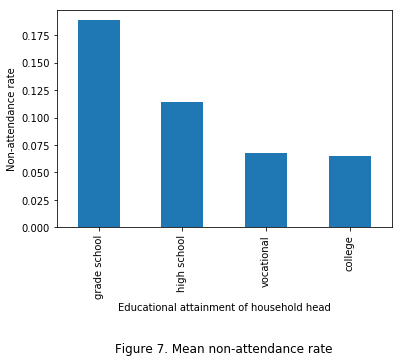

In [311]:
# Plot mean of the number of children who do not go to school per educational attainment group (nonatt_per_grp).
nonatt_per_grp = (1 - (df_hh_2014.groupby("educal2")["numschool"].sum() / df_hh_2014.groupby("educal2")["numchild"].sum())).reset_index()

key = nonatt_per_grp["educal2"].map(educ_mapping)
nonatt_per_grp = nonatt_per_grp.iloc[key.argsort()]

nonatt_per_grp.plot.bar(x = nonatt_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Non-attendance rate")
plt.title("Figure 7. Mean non-attendance rate", y = -0.6)

As expected, from Figure 7, households where the heads only finished up to grade school are associated with the greatest rates of non-attendance in school. At what level do they stop schooling?

To answer this, we can examine the highest educational attainment of the non-attending children per educational attainment group.

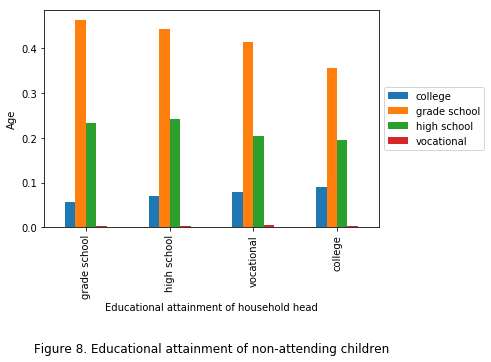

In [312]:
# Plot educational attainment of children
hh_subset = df_hh_2014[["mainid", "educal2"]]
df_mem_2014 = pd.merge(df_mem_2014, hh_subset, on = "mainid", how = "left")

df_mem_2014["educal3"] = df_mem_2014["educal"].apply(lambda x: "grade school" if x in gs_idx else ("high school" if x in hs_idx else ("vocational" if x in voc_idx else ("college" if x in col_idx else np.nan))))
df_mem_2014_sub = df_mem_2014[(df_mem_2014["reln"].isin([3, 4, 5])) & (df_mem_2014["age_yr"] >= 6) & (df_mem_2014["age_yr"] <= 20)]
educal_per_grp = df_mem_2014_sub.groupby(["educal2", "educal3"])["educal2"].count() / df_hh_2014.groupby("educal2")["educal2"].count()
educal_per_grp = educal_per_grp.unstack("educal3").reset_index()

key = educal_per_grp["educal2"].map(educ_mapping)
educal_per_grp = educal_per_grp.iloc[key.argsort()]

educal_per_grp.plot.bar(x = educal_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Age")
plt.title("Figure 8. Educational attainment of non-attending children", y = -0.6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

We see from Figure 8 that most of the children of schooling age finish high school at least, regardless of educational attainment.

We can also examine the mean age of the non-attending children per educational attainment group.

Text(0.5,-0.6,'Figure 9. Mean age of non-attending children')

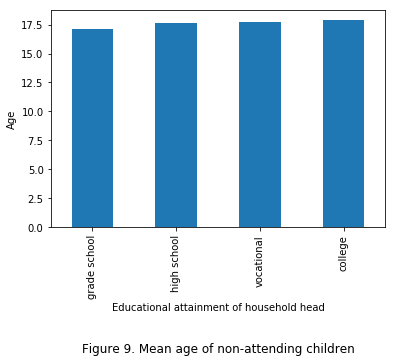

In [313]:
# Plot mean age of non-attending children
df_hh_2014["num_not_school"] = df_hh_2014["numchild"] - df_hh_2014["numschool"]
age_per_grp = (df_hh_2014.groupby("educal2")["sum_ages_not_school"].sum() / df_hh_2014.groupby("educal2")["num_not_school"].sum()).reset_index()

key = age_per_grp["educal2"].map(educ_mapping)
age_per_grp = age_per_grp.iloc[key.argsort()]

age_per_grp.plot.bar(x = age_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Age")
plt.title("Figure 9. Mean age of non-attending children", y = -0.6)

Figure 9 shows that for all four educational attainment groups, the mean age of non-attending children is at around 17 years old, which coincides with the age at which most children begin college. 

Thus, non-attendance (at least in the case of Pasay City) is primarily a matter of getting students to pursue either vocational school or college, regardless of the educational attainment of the household head. This is especially true for the case of households where the household head finished within grade school, because as mentioned awhile ago, they are associated with a significantly higher dropout rate. 

Text(0.5,-0.25,'Figure 10. Age of non-attending children')

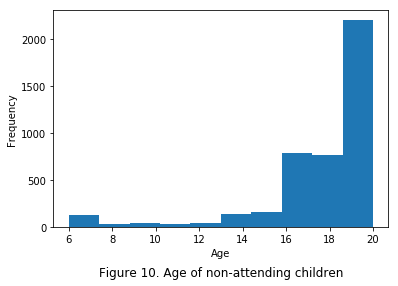

In [314]:
# Plot histogram of age of non-attending children
hh_subset = df_mem_2014[["mainid", "reln", "age_yr", "educind"]]
hh_subset = hh_subset[(hh_subset["reln"].isin([3, 4, 5])) & (hh_subset["age_yr"] >= 6) & (hh_subset["age_yr"] <= 20) & (hh_subset["educind"] == 0)]
plt.hist(hh_subset["age_yr"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Figure 10. Age of non-attending children", y = -0.25)

The histogram in Figure 10 also supports the fact that a majority of the children who dropout are from the ages of 17-20, meaning that they stop attending college. This could be because they pursued an associates degree, making them finish earlier. This could also be because of other factors.

Text(0.5,-0.6,'Figure 11. Mean non-attendance rate by sex')

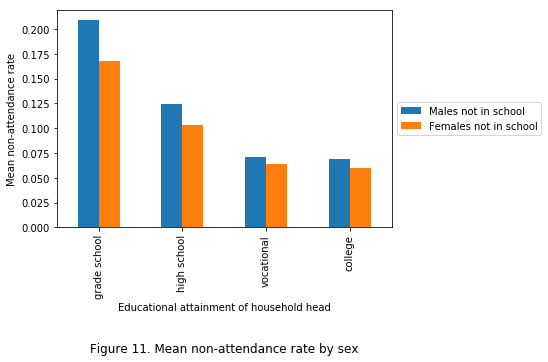

In [315]:
# Plot gender of non-attending children per educational attainment group.
gen_per_grp1 = (df_hh_2014.groupby("educal2")["male_not_school"].sum() / df_hh_2014.groupby("educal2")["male"].sum()).to_frame("male_not_school")
gen_per_grp2 = (df_hh_2014.groupby("educal2")["female_not_school"].sum() / df_hh_2014.groupby("educal2")["female"].sum()).to_frame("female_not_school")
df_gen = pd.concat([gen_per_grp1, gen_per_grp2], axis = 1).reset_index()

key = df_gen["educal2"].map(educ_mapping)
df_gen = df_gen.iloc[key.argsort()]

df_gen[["male_not_school", "female_not_school"]].plot.bar(x = df_gen["educal2"])
plt.xlabel("Educational attainment of household head")
plt.ylabel("Mean non-attendance rate")
plt.legend(["Males not in school", "Females not in school"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Figure 11. Mean non-attendance rate by sex", y = -0.6)

To determine what these other factors might be, we can plot the number of non-attending students by gender and see if it paints a better picture. Figure 11 shows that on average, males are more likely to dropout, probably to help in supporting the family. Females are also associated with a higher dropout rate among households where the head only finished within grade school, probably due to a higher incidence of teenage pregnancies among these households.

We can check our first claim by referring to the variable `jobind` and computing the number of school-age children who have a job per educational attainment group.

Text(0.5,-0.6,'Figure 12. Percentage of Employed Non-Attending Children')

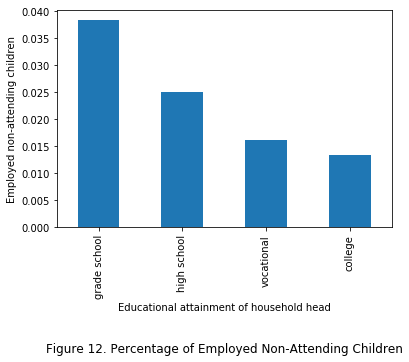

In [316]:
# Plot employed non-attending children per educational attainment group.
childemp_per_grp = (df_hh_2014.groupby("educal2")["childemp"].sum() / df_hh_2014.groupby("educal2")["childemp"].count()).reset_index()

key = childemp_per_grp["educal2"].map(educ_mapping)
childemp_per_grp = childemp_per_grp.iloc[key.argsort()]

childemp_per_grp.plot.bar(x = childemp_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Employed non-attending children")
plt.title("Figure 12. Percentage of Employed Non-Attending Children", y = -0.6)

From Figure 12, we see that households where the household head stopped earlier are associated with higher rates of employment among school-age children.

We cannot check the second claim directly, as there is no variable that indicates the frequency of teenage pregnancies per household. However, the variable `uniparind` allows us to check how many single parent families there are per household.

Text(0.5,-0.6,'Figure 13. Mean Incidence of Single Parents')

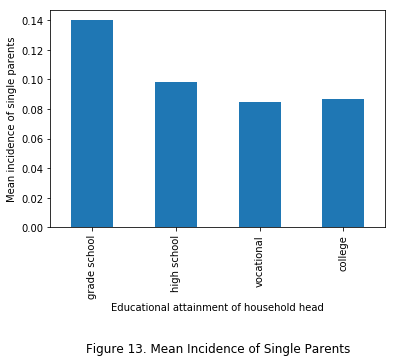

In [317]:
# Plot incidence of single parents per educational attainment group.
df_hh_2014["uniparind"] = df_hh_2014["uniparind"].apply(lambda x: 1 if x == 1 else 0)
uniparind_per_grp = (df_hh_2014.groupby("educal2")["uniparind"].sum() / df_hh_2014.groupby("educal2")["educal2"].count()).reset_index()

key = uniparind_per_grp["educal2"].map(educ_mapping)
uniparind_per_grp = uniparind_per_grp.iloc[key.argsort()]

uniparind_per_grp.plot.bar(x = uniparind_per_grp["educal2"], legend = False)
plt.xlabel("Educational attainment of household head")
plt.ylabel("Mean incidence of single parents")
plt.title("Figure 13. Mean Incidence of Single Parents", y = -0.6)

Figure 13 shows that households where the household head had only finished within high school are associated with a higher average incidence of single parents -- be it that the household head is himself/herself a single parent or one of the children gave birth to a child at a relatively young age. Again, this goes in line with the claim that education helps instill proper family planning/management. Moreover, household heads who pursue higher education are likely to postpone family planning and as such, they probably could be expected to make more mature decisions regarding such.

Lastly, we can consider the variable `ynotsch`, which details why the child did not consider going to school.

Text(0.5,-0.25,'Figure 14. Reasons for Not Studying')

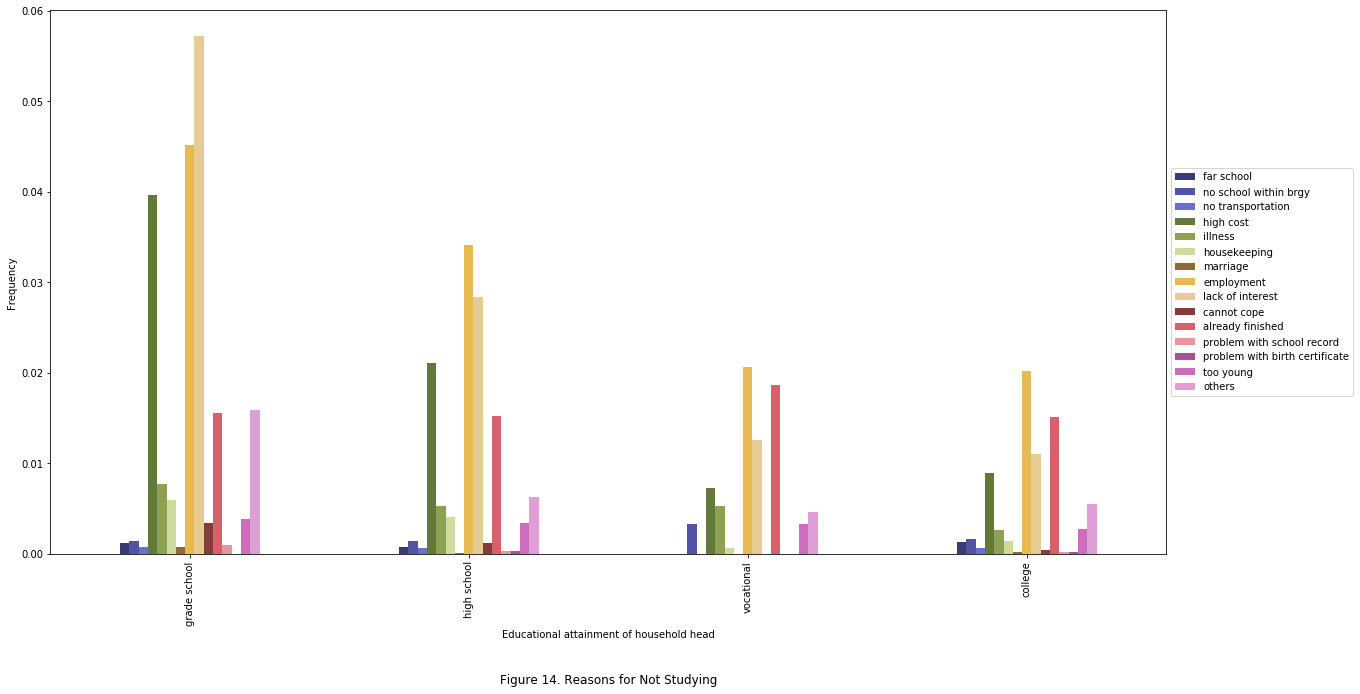

In [318]:
# Plot reasons for studying per educational attainment group
hh_subset = df_mem_2014[(df_mem_2014["reln"].isin([3, 4, 5])) & (df_mem_2014["age_yr"] >= 6) & (df_mem_2014["age_yr"] <= 20)]
ynotsch = hh_subset.groupby(["educal2", "ynotsch"])["educal2"].count() / hh_subset.groupby("educal2")["educal2"].count()
ynotsch = ynotsch.unstack(["ynotsch"]).reset_index()

key = ynotsch["educal2"].map(educ_mapping)
ynotsch = ynotsch.iloc[key.argsort()]

ynotsch.plot.bar(x = ynotsch["educal2"], figsize = (20, 10), colormap = "tab20b")
plt.xlabel("Educational attainment of household head")
plt.ylabel("Frequency")
ynotsch_list = ["far school", "no school within brgy", "no transportation", "high cost", "illness", "housekeeping", "marriage", "employment", \
               "lack of interest", "cannot cope", "already finished", "problem with school record", "problem with birth certificate", "too young", \
               "others"]
plt.legend(ynotsch_list, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Figure 14. Reasons for Not Studying", y = -0.25)

From Figure 14, looking for employment and being too young were primary reasons across all educational attainment groups. This was especially so for households where the household head stopped studying ealier.

Most notably, for households where the household head finished up to grade school or high school, the high cost of education and a lack of interest on the part of the children were reasons not commonly found among the other two groups. 

<b> SUMMARY: </b>

Summarily, households where the household head stopped school early are associated with higher non-attendance rates. Most of the dropouts happen to be around 17 years old, regardless of educational attainment. This suggests that many of the non-attending children stop at high school.

We posited that this may be the case because (1) they start looking for work or (2) they begin families at a young age. Using exploratory data analysis, we found out that this may very well be the case, especially for households where the household head stopped school early.

Finally, by looking at the reasons why the children stopped attending school, we note that in general, many of the dropouts seek employment after high school. Moreover, there are some marked differences between the responses of those where the household head dropped out early and of those where they stayed up to vocational school/college.

##### 3) What jobs are associated with household heads with a certain educational attainment?

Another way by which the household head's educational attainment can influence a household's poverty status is by affecting his/her own employment outcomes. Education is supposed to help one hone skills for gainful employment. Thus, we assume that households with less educated household heads must have less profitable jobs, making them more vulnerable to poverty.

In [319]:
# Generate necessary variables
hh_subset = df_mem_2014[["mainid", "reln", "psoc4", "jstatus"]]
hh_subset = hh_subset[hh_subset["reln"] == 1].reset_index(drop = True)
hh_subset = hh_subset.drop("reln", axis = 1)

df_hh_2014 = pd.merge(df_hh_2014, hh_subset, on = "mainid", how = "left")

As with awhile ago, we get variables from the member-level dataset and append them to the household-level dataset.

In [320]:
# Clean psoc4 column and generate psoc42 column
valid_vals = [str(i) for i in np.arange(1, 10)]

df_hh_2014["psoc4"].fillna(0, inplace = True)
df_hh_2014["psoc4"] = df_hh_2014["psoc4"].apply(lambda x: str(x))
df_hh_2014["psoc42"] = df_hh_2014["psoc4"].apply(lambda x: x[0] if x[0] in valid_vals else 0)
df_hh_2014["psoc42"] = df_hh_2014["psoc42"].drop(df_hh_2014[df_hh_2014["psoc42"] == 0].index, axis = 0)

We begin by plotting `psoc42`, a variable derived from `psoc4 `which describes the type of job the household heads are employed in.

Text(0.5,-1.3,'Figure 15. Primary Occupation Group')

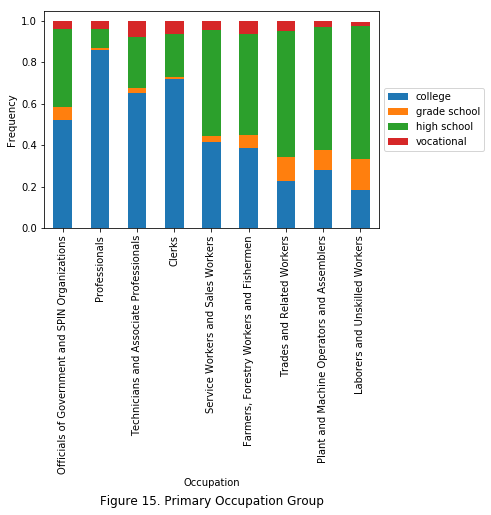

In [321]:
# Plot psoc42
hh_subset = df_hh_2014.groupby(["psoc42", "educal2"])["psoc42"].count() / df_hh_2014.groupby("psoc42")["psoc42"].count()
hh_subset = hh_subset.unstack("educal2")
ax = hh_subset.plot.bar(stacked = True, legend = False)
ax.set_xlabel("Occupation")
ax.set_ylabel("Frequency")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
occ_labels = ["Officials of Government and SPIN Organizations", "Professionals", "Technicians and Associate Professionals", \
              "Clerks", "Service Workers and Sales Workers", "Farmers, Forestry Workers and Fishermen", "Trades and Related Workers", \
              "Plant and Machine Operators and Assemblers", "Laborers and Unskilled Workers"]
ax.set_xticklabels(occ_labels)
ax.set_title("Figure 15. Primary Occupation Group", y = -1.3)

From Figure 15, we find that most household heads who finished within grade school and high school take on mostly unskilled jobs, whereas household heads who finished within college take on mostly professional jobs, again reinforcing the fact that education helps develop skills to take on higher-paying jobs.

We also plot the educational attainment of the household head against the nature of employment, described by the variable `jstatus`.

In [322]:
# Clean jstatus column
df_hh_2014["jstatus"] = df_hh_2014["jstatus"].dropna(axis = 0)
df_hh_2014["jstatus"] = df_hh_2014["jstatus"].apply(lambda x: "permanent" if x == 1 else("short-term" if x == 2 else "different jobs"))

Text(0.5,-0.6,'Figure 16. Nature of Employment')

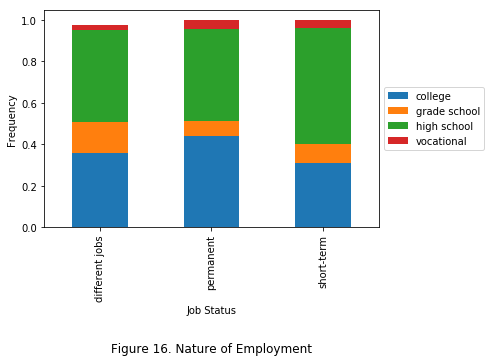

In [323]:
# Plot jstatus
hh_subset = df_hh_2014.groupby(["jstatus", "educal2"])["jstatus"].count() / df_hh_2014.groupby("jstatus")["jstatus"].count()
hh_subset = hh_subset.unstack("educal2")
ax = hh_subset.plot.bar(stacked = True, legend = False)
ax.set_xlabel("Job Status")
ax.set_ylabel("Frequency")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Figure 16. Nature of Employment", y = -0.6)

Figure 16 tells us that most of the employed household heads who finished within grade school seem to move from job to job. Meanwhile, most of the employed household heads who finished within high school at least have short-term employment, while most of the employed household heads who are college graduates have permanent employment. 

<b> SUMMARY: </b>
    
We find that less educated household heads are associated with unskilled jobs and are more likely to flit from job to job. On the other hand, those who chose to pursue higher education have more permanent and high-paying jobs. This does not come as a surprise to us, but it is a factor which helps explain why households with heads who dropped out of school earlier are more likely to be poor on average. 

### 3.3.3 Statistical Analysis

Since the CBMS dataset is itself a sample of the entire Pasay City population, we use the entire dataset for the statistical analysis.

##### 1) How is the educational attainment of the household head related to particular poverty measures/correlates (e.g., income per capita, family size, dependency ratio, etc.)? 

To determine whether the educational attainment of a household head is independent of the household's poverty status or not, we use the <b> chi-squared test of independence </b>. The chi-squared test of independence is used to relate two categorical variables, and determines whether or not both variables are independent or not independent.

Following the steps of hypothesis testing, 

##### Step 1: Formulate the null hypothesis $H_0$ and the alternative hypothesis $H_a$. 

$H_0$: The educational attainment of a household head is independent of a household's poverty status. 

$H_a$: The educational attainment of a household head is NOT independent of a household's poverty status.

##### Step 2: Decide on a level of significance $α$

We choose $\alpha = 0.05$

In [324]:
alpha = 0.05

##### Step 3: Choose (and compute) the appropriate test statistic.

We first make the appropriate table detailing educational attainment and poverty status.

In [325]:
# Create table
poor_grp = df_hh_2014.groupby("educal2")["ispoor"].sum().to_frame("poor").reset_index()
non_poor_grp = (df_hh_2014.groupby("educal2")["educal"].count() - df_hh_2014.groupby("educal2")["ispoor"].sum()).to_frame("non-poor").reset_index()
pov_table = pd.merge(poor_grp, non_poor_grp, on = "educal2")
pov_table.set_index("educal2", inplace = True)
pov_table

,poor,non-poor
educal2,,
college,1152,22479
grade school,1010,4400
high school,3508,24246
vocational,131,1988


We can calculate the chi-squared test statistic using the package `scipy.stats`.

In [326]:
# Calculate the test statistic
import scipy.stats as stats

pov_table_list = []
for row in pov_table.index.values:
    pov_table_list.append([pov_table.loc[row, col] for col in pov_table.columns])

stat, p, dof, expected = stats.chi2_contingency(pov_table_list)
stat

1408.3059147954496

##### Step 4: Formulate the decision rule.

For a chi-squared test of independence (or for any test involving the chi-squared distribution for that matter), we reject the null hypothesis if the chi-squared test statistic is greater than the critical value, and we do not reject it if the test statistic is less than the critical value.

To get the critical value, we need `prob`, which is the 1 - level of significance and `dof`, which is the degrees of freedom, computed earlier and stored in the variable `dof`.

In [327]:
# Compute for critical value
crit_val = stats.chi2.ppf(1 - alpha, dof)
crit_val

7.8147279032511765

Thus, the decision rule is:

In [328]:
print("Reject Ho if test statistic >= {:0.3f}. Otherwise, fail to reject null hypothesis".format(crit_val))

Reject Ho if test statistic >= 7.815. Otherwise, fail to reject null hypothesis


We can also use the p-value, which has been computed for us and stored in the variable `p`. In this case, the decision rule will be:

In [329]:
print("Reject Ho if p-value <= {:0.2f}. Otherwise, fail to reject null hypothesis".format(alpha))

Reject Ho if p-value <= 0.05. Otherwise, fail to reject null hypothesis


##### Step 5: Make a decision.

In [330]:
p

4.643578614619001e-305

Using the p-value approach, 3.736e-27 < 0.05. From the decision rule, we reject $H_0$. 

##### Step 6: Make a conclusion.

At $\alpha = 5\%$, we can conclude that educational attainment of a household head is NOT independent of a household's poverty status.

The test only determines independence and not the direction of relationship. For this, we would have to inspect trends in the data. From Figure 2, we see that a lower educational attainment is associated with higher poverty incidence. Thus, we can conclude that households where the household head stopped attending school earlier are more likely to experience poverty.

##### 2) How does the educational attainment of the household head affect the educational outcomes of his/her children? 

To determine whether the educational attainment of a household head affects his/her children's educational outcomes, we focus on how the household head's educational attainment affects non-attendance rates among his/her children. For this purpose, we can use a <b> logistic regression </b> to determine how the educational attainment of the household head affects the probability of his/her child of going past high school into vocational courses or college.

In [331]:
# Gather necessary variables and append to df_mem_2014 dataset
hh_subset = df_hh_2014[["mainid", "depratio", "sex", "age_yr", "educal", "ispoor"]]
df_mem_2014 = pd.merge(df_mem_2014, hh_subset, on = "mainid", how = "left")

In [332]:
# Generate dummy variables (sex)
# baseline: male
df_mem_2014["female"] = df_mem_2014["sex_y"].apply(lambda x: 1 if x == 0 else 0)

# Generate dummy variables (educal)
# baseline: college
df_mem_2014["gradeschool"] = df_mem_2014["educal2"].apply(lambda x: 1 if (x == "grade school" or x == "high school" or  x == "vocational" or x == "college") else 0) 
df_mem_2014["highschool"] = df_mem_2014["educal2"].apply(lambda x: 1 if (x == "high school" or  x == "vocational" or x == "college") else 0)
df_mem_2014["vocational"] = df_mem_2014["educal2"].apply(lambda x: 1 if x == "vocational" else 0)

# Generate dependent variable (afterhighschool)
df_mem_2014["afterhighschool"] = df_mem_2014["educal3"].apply(lambda x: 1 if (x == "vocational" or x == "college") else 0)

In [333]:
# Specify y (dependent variable) and x (independent variable) and run logistic regression
df_mem_2014_sub = df_mem_2014[(df_mem_2014["reln"].isin([3, 4, 5])) & (df_mem_2014["age_yr_x"] >= 6) & (df_mem_2014["age_yr_x"] <= 20)]
df_mem_2014_sub = df_mem_2014_sub[["afterhighschool", "depratio", "sex_x", "age_yr_y", "highschool", "vocational", "gradeschool", "ispoor"]]
df_mem_2014_sub = df_mem_2014_sub.dropna(axis = 0)

import statsmodels.api as sm
y = df_mem_2014_sub["afterhighschool"]
x = df_mem_2014_sub[["depratio", "sex_x", "age_yr_y", "gradeschool", "highschool", "vocational", "ispoor"]]

logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.270844
         Iterations 8
                         Results: Logit
Model:              Logit            No. Iterations:   8.0000    
Dependent Variable: afterhighschool  Pseudo R-squared: 0.228     
Date:               2018-12-13 23:43 AIC:              23057.9286
No. Observations:   42541            BIC:              23118.5361
Df Model:           6                Log-Likelihood:   -11522.   
Df Residuals:       42534            LL-Null:          -14917.   
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
depratio     -5.5023    0.0912  -60.3096  0.0000  -5.6812  -5.3235
sex_x         0.2429    0.0337    7.2145  0.0000   0.1769   0.3089
age_yr_y      0.0554    0.0018   30.1710  0.0000   0.0518   0

From the results, you can see that the dependency ratio, the family being poor and the household head finishing within or up to grade school have negative coefficients. This means that these factors negatively affect the probability that the child proceeds to vocational courses/college after high school. 

On the other hand, the age of the household head and the household head finishing high school or vocational school have positive coefficients, meaning that these encourage children to go past high school.

The coefficients for `gradeschool`, `highschool` and `vocational` are to be interpreted relative to the baseline, which is the household head finishing up to or within grade school. Thus, the household heads finishing high school or vocational school in addition to college are more likely to have children who will proceed past high school. Meanwhile, households where the household heads finished grade school are less likely to do so compared to those where the household heads finished college.

The same is trye for the variable `sex_x`. Thus, females are more likely to proceed after high school compared to males.

Moreover, all variables except `vocational` are signficant since their p-values are less than the level of significance we have chosen, which is 0.05.

Do note that the model could be improved upon. However, the results are mostly in line with what had been observed in the exploratory data analysis part.

## 4. CONCLUSION

From point 1 in part 3, we determined that households where the household heads stopped attending school earlier are poorer on average. Based on the other poverty correlates, they also bear the burden of having larger families, more dependents, and are more likely (on average) to experience food shortage and to participate in the government's CCT program.

We explore why this is the case in points 2 and 3. In point 2, we explore how the household head's educational attainment can affect his/her children's or grandchildren's educational outcomes. We found out that on average, households where the head stopped attending school earlier tend to be associated with higher non-attendance rates. We also posited that most of the students stop after high school, and that in some cases, it may be due to a child opting to help support his/her family or a child getting pregnant early into her teens. Upon delving into their reasons, we find that among households where the head stopped attending school earlier, the children felt like the cost of education was too high or that they did not find interest in their studies anymore.

We also explore how the educational attainment of the household head affects his/her job outcomes. Again, household heads who stopped attending school earlier tend to have unskilled jobs and they also tend to move from job to job. Meanwhile, household heads who had at least reached college were predominant in managerial and professional jobs, and primarily had permanent employment. 

To test our observations in the exploratory data analysis part, we employed a chi-squared test and a logistic. We conclude that the educational attainment of the household head is related to a household's poverty status, and that this is due in part to the household head's educational attainment affecting a child's probability of going past high school.

All in all, while college is not a guarantee to a good life, as the graphs suggest, it at least makes it more likely for one to achieve better job outcomes, and for one's children/grandchildren to achieve better educational outcomes. Moreover, we emphasized in part 2 that poorer households tend to forgo education, so that when they start their own households, those too are more likely to become poor. Thus, poverty can influence lower educational outcomes, but as we emphasized in part 3, lower educational outcomes also influence one's job outcomes, thus reinforcing poverty. This paints a picture of poverty being a vicious cycle, with education (or lack thereof) being one of the main contributors. The role of education in this poverty trap deserves to be emphasized and studied more using government datasets like the CBMS.   

We would like to recommend that barangays start using the educational attainment of household heads as a screening variable to determine targets for their government programs. We also recommend that they institute family planning, sex education and career counselling programs for households where the household head dropped early.